In [1984]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [1985]:
train = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')

In [1986]:
test = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

In [1987]:
test.shape

(418, 11)

In [1988]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [1989]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1990]:
train.shape

(891, 12)

In [1991]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1992]:
train.shape

C:\Users\Bluechip\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(891, 12)

In [1993]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1994]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1995]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1996]:
train.duplicated().sum()

0

In [1997]:
test.duplicated().sum()

0

In [1998]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Visualization

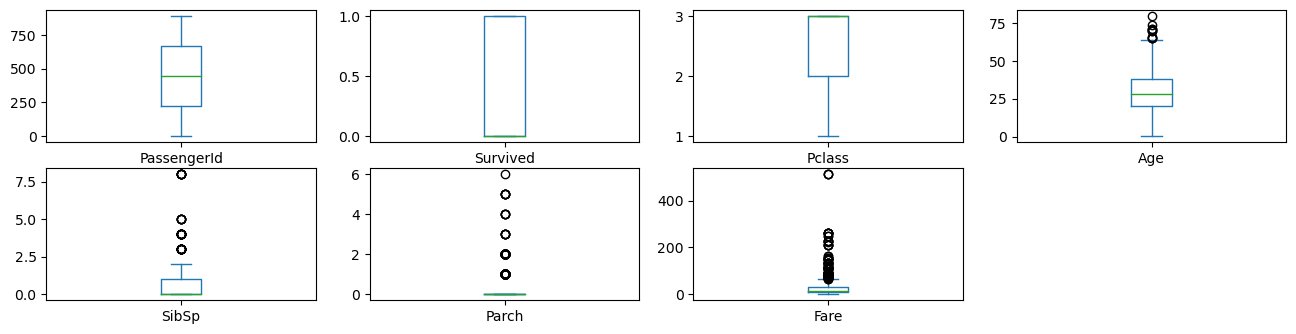

In [1999]:
# box (subplots) helps to identify outliers
train.plot(kind='box', subplots=True, layout=(6,4), sharex=False, sharey=False, figsize=(16,12))
plt.show()

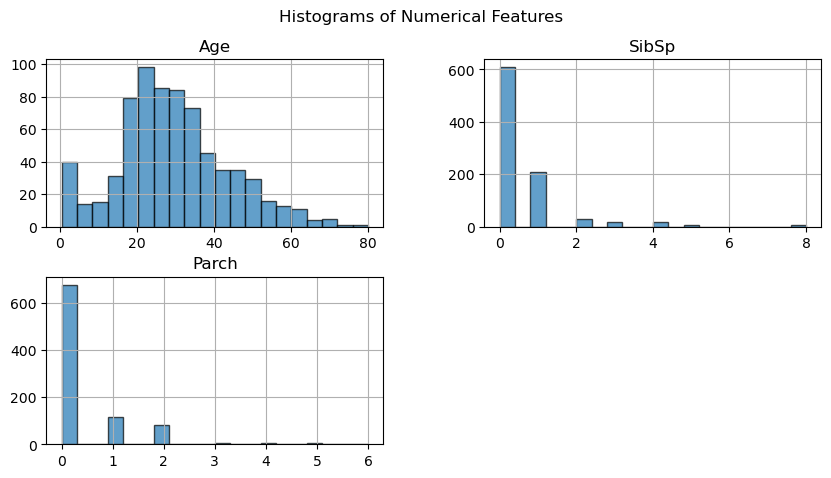

In [2000]:
# List of numerical columns
numerical_columns = ['Age', 'SibSp', 'Parch']

# Plot histograms
train[numerical_columns].hist(bins=20, figsize=(10, 5), edgecolor='k', alpha=0.7)
plt.suptitle('Histograms of Numerical Features')
plt.show()

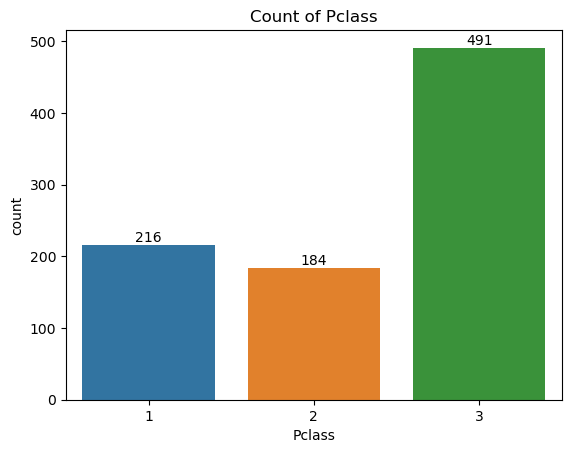

In [2001]:
sns.countplot(x='Pclass', data = train)
plt.title('Count of Pclass')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

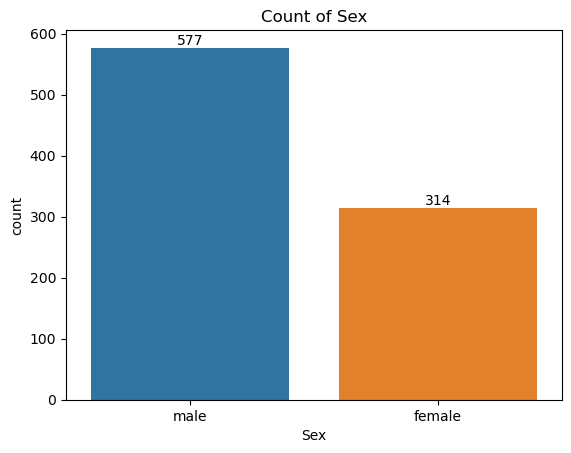

In [2002]:
sns.countplot(x = 'Sex', data = train)
plt.title('Count of Sex')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

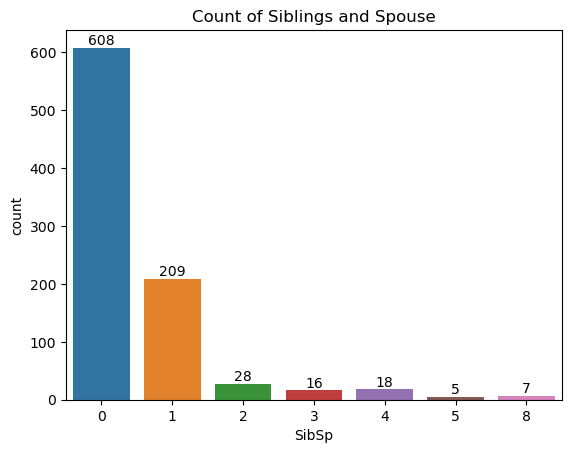

In [2003]:
sns.countplot(x = 'SibSp', data = train)
plt.title('Count of Siblings and Spouse')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

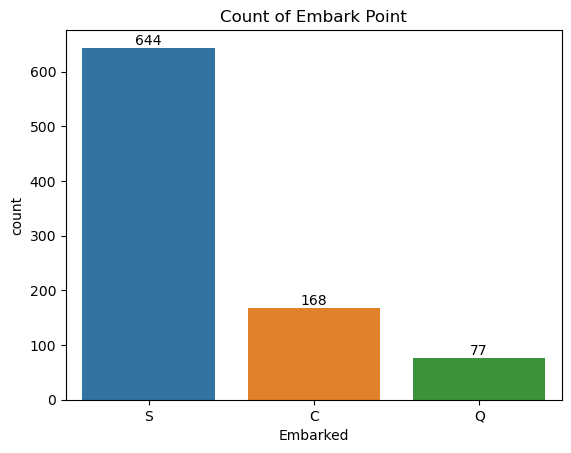

In [2004]:
sns.countplot(x = 'Embarked', data = train)
plt.title('Count of Embark Point')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

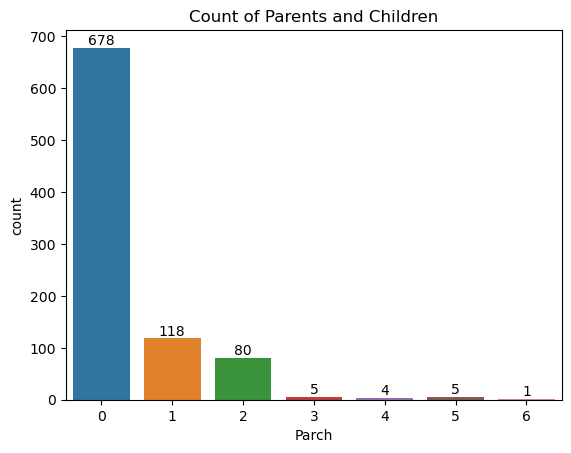

In [2005]:
sns.countplot(x = 'Parch', data = train)
plt.title('Count of Parents and Children')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [2006]:
train['Age'].max()

80.0

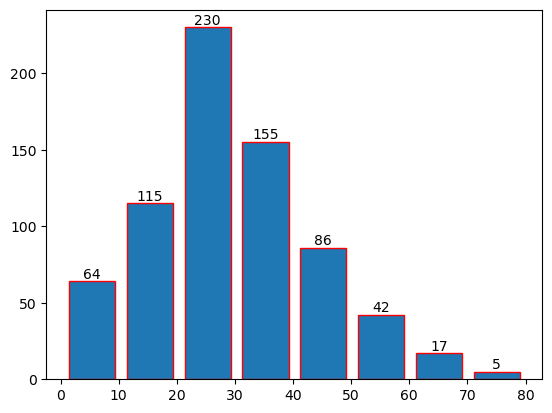

In [2007]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(x='Age',data = train, bins = 8, edgecolor = 'red', rwidth=0.8)


for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

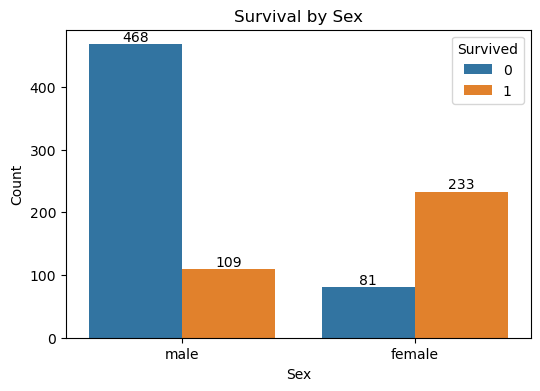

In [2008]:
plt.figure(figsize=(6, 4))
sns.countplot(data = train, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

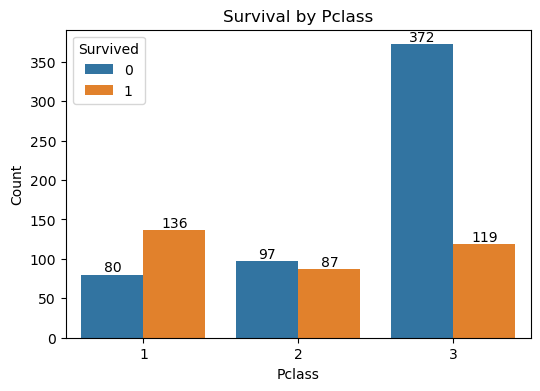

In [2009]:
plt.figure(figsize=(6, 4))
sns.countplot(data = train, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

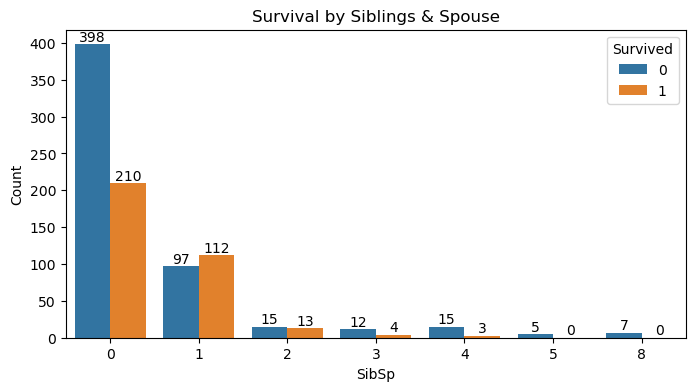

In [2010]:
plt.figure(figsize=(8, 4))
sns.countplot(data = train, x='SibSp', hue='Survived')
plt.title('Survival by Siblings & Spouse')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

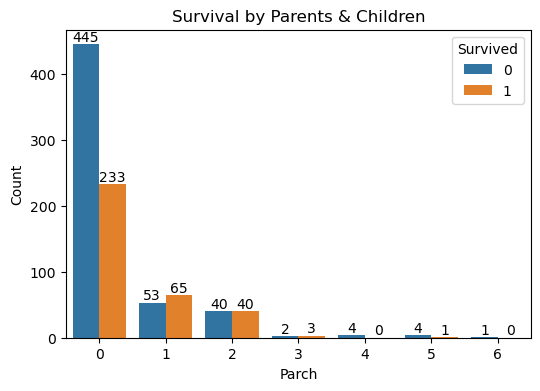

In [2011]:
plt.figure(figsize=(6, 4))
sns.countplot(data = train, x='Parch', hue='Survived')
plt.title('Survival by Parents & Children')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

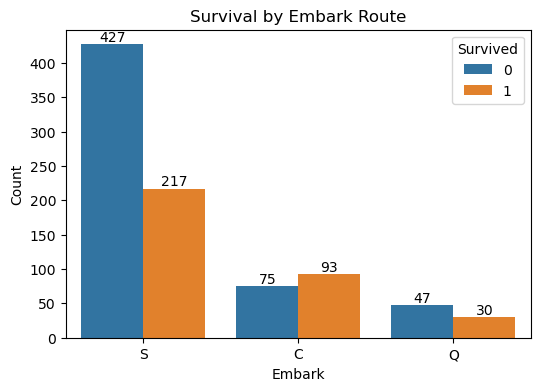

In [2012]:
plt.figure(figsize=(6, 4))
sns.countplot(data = train, x='Embarked', hue='Survived')
plt.title('Survival by Embark Route')
plt.xlabel('Embark')
plt.ylabel('Count')
plt.legend(title='Survived')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Negative (0):  549
Positive (1):  342


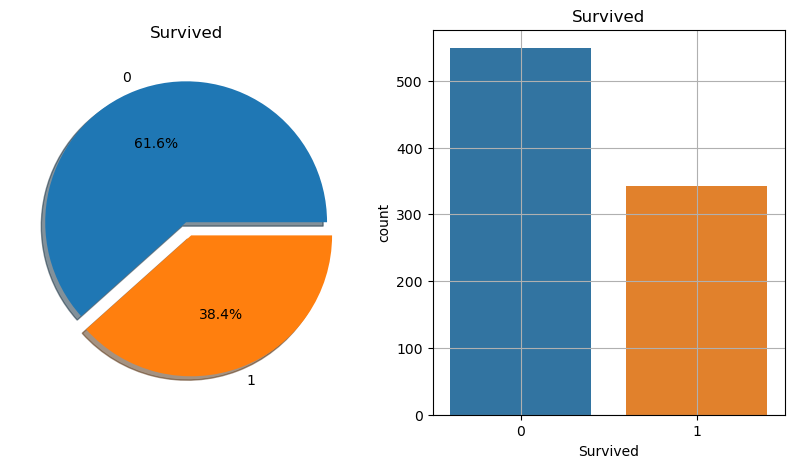

In [2013]:
# Outcome count plot
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie plot
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Survived', data = train, ax = ax[1])
ax[1].set_title('Survived')

# Display the counts
N, P = train['Survived'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)

plt.grid()
plt.show()


### Handling Missing Values

In [2014]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2015]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [2016]:
mean_age_by_Pclass_train = train.groupby('Pclass')['Age'].transform('mean')
train['Age'].fillna(mean_age_by_Pclass_train, inplace=True)

In [2017]:
mean_age_by_Pclass_test = test.groupby('Pclass')['Age'].transform('mean')
test['Age'].fillna(mean_age_by_Pclass_test, inplace=True)

In [2018]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2019]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [2020]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [2021]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [2022]:
# replace the missing values in 'Embarked' column with the highest occuring input "S"
train['Embarked'].fillna('S', inplace=True)

In [2023]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [2024]:
test.dropna(subset=['Fare'], inplace=True)

In [2025]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [2026]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  Cabin Distinction
- First Class: A, B, C
- Second Class: D, E
- Third Class; F, G

In [2027]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [2028]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [2029]:
train = train[train['Cabin'] != 'T']

In [2030]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [2031]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [2032]:
train["CabinClass"] = train["Cabin"].str[0]

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\1178724461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["CabinClass"] = train["Cabin"].str[0]


In [2033]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [2034]:
train.shape

(890, 13)

In [2035]:
train['Cabin'].fillna('Unknown', inplace = True)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\2454720196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'].fillna('Unknown', inplace = True)


In [2036]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
CabinClass     687
dtype: int64

### Feature Engineering

In [2037]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train.head()


C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\3351639315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,NaN,Mr


In [2038]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [2039]:
train['Title'].value_counts()

Title
Mr          516
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [2040]:
test['Title'].value_counts()

Title
Mr        239
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [2041]:
# Filter the DataFrame where Title equals "Mme"
mme_rows = train[train['Title'] == 'Mme']

mme_names_titles = mme_rows[['Name', 'Title', 'Age']]

mme_names_titles

,Name,Title,Age
369,"Aubart, Mme. Leontine Pauline",Mme,24.0


In [2042]:
# Filter the DataFrame where Title equals "Mme"
dona_row = test[test['Title'] == 'Dona']

dona_name_title = dona_row[['Title', 'Age']]

dona_name_title

,Title,Age
414,Dona,39.0


In [2043]:
title_mapping = {'Mme': 'Mrs', 'Mlle': 'Miss', 'Ms': 'Miss'}

train['Title'] = train['Title'].replace(title_mapping)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\2296095905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train['Title'].replace(title_mapping)


In [2044]:
title_mapping = {'Dona': 'Mrs', 'Ms': 'Miss'}

test['Title'] = test['Title'].replace(title_mapping)

In [2045]:
train['Title'].value_counts()

Title
Mr          516
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Major         2
Col           2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [2046]:
test['Title'].value_counts()

Title
Mr        239
Miss       79
Mrs        73
Master     21
Col         2
Rev         2
Dr          1
Name: count, dtype: int64

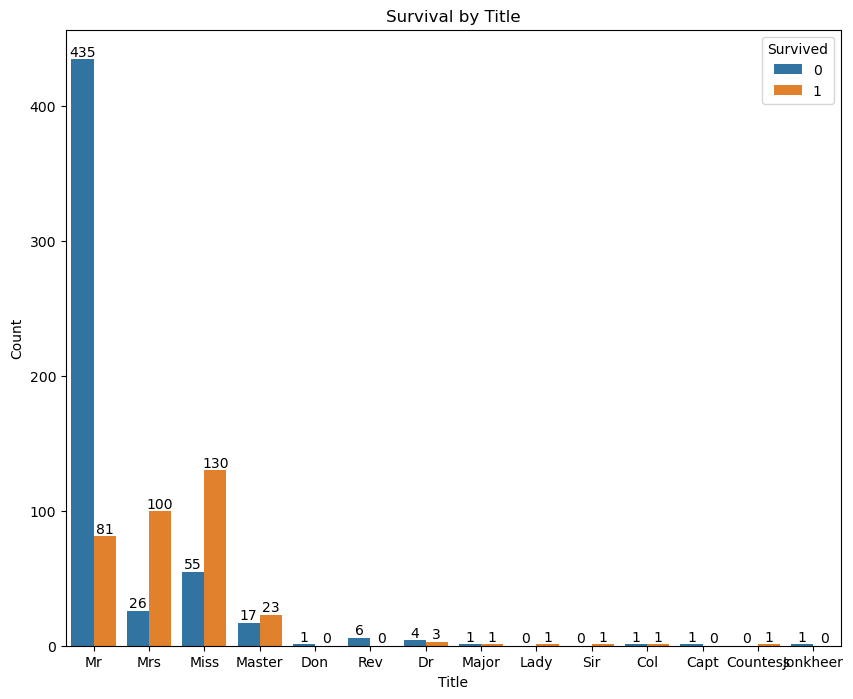

In [2047]:
plt.figure(figsize=(10, 8))
sns.countplot(data = train, x='Title', hue='Survived')
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.legend(title='Survived')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [2048]:
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

In [2049]:
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\1428265682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)


In [2050]:
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

In [2051]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
CabinClass     687
Title            0
AgeGroup         1
dtype: int64

In [2052]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
Title            0
AgeGroup         0
dtype: int64

In [2053]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  417 non-null    int64   
 1   Pclass       417 non-null    int64   
 2   Name         417 non-null    object  
 3   Sex          417 non-null    object  
 4   Age          417 non-null    float64 
 5   SibSp        417 non-null    int64   
 6   Parch        417 non-null    int64   
 7   Ticket       417 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     417 non-null    object  
 11  Title        417 non-null    object  
 12  AgeGroup     417 non-null    category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 43.0+ KB


In [2054]:
# Extract the row(s) where 'AgeGroup' is null
null_agegroup_rows = train[train['AgeGroup'].isna()].reset_index()
null_agegroup_rows

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Title,AgeGroup
0,630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,A,Mr,NaN


In [2055]:
train['AgeGroup'].fillna('Senior', inplace = True)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\1621654051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AgeGroup'].fillna('Senior', inplace = True)


In [2056]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,NaN,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,Middle-aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,NaN,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,Middle-aged
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,NaN,Mr,Middle-aged


In [2057]:
train['CabinClass'].value_counts()

CabinClass
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [2058]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  890 non-null    int64   
 1   Survived     890 non-null    int64   
 2   Pclass       890 non-null    int64   
 3   Name         890 non-null    object  
 4   Sex          890 non-null    object  
 5   Age          890 non-null    float64 
 6   SibSp        890 non-null    int64   
 7   Parch        890 non-null    int64   
 8   Ticket       890 non-null    object  
 9   Fare         890 non-null    float64 
 10  Cabin        890 non-null    object  
 11  Embarked     890 non-null    object  
 12  CabinClass   203 non-null    object  
 13  Title        890 non-null    object  
 14  AgeGroup     890 non-null    category
dtypes: category(1), float64(2), int64(5), object(7)
memory usage: 105.4+ KB


In [2059]:
train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'CabinClass'], inplace = True)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\3464078710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'CabinClass'], inplace = True)


In [2060]:
test.drop(columns = ['Name', 'Ticket', 'Fare', 'Cabin'], inplace = True)

In [2061]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,male,22.0,1,0,S,Mr,Adult
1,1,1,female,38.0,1,0,C,Mrs,Middle-aged
2,1,3,female,26.0,0,0,S,Miss,Adult
3,1,1,female,35.0,1,0,S,Mrs,Middle-aged
4,0,3,male,35.0,0,0,S,Mr,Middle-aged


In [2062]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,male,34.5,0,0,Q,Mr,Adult
1,893,3,female,47.0,1,0,S,Mrs,Middle-aged
2,894,2,male,62.0,0,0,Q,Mr,Senior
3,895,3,male,27.0,0,0,S,Mr,Adult
4,896,3,female,22.0,1,1,S,Mrs,Adult


In [2063]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Title', 'AgeGroup'],
      dtype='object')

In [2064]:
train_copy = train.copy()
train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,male,22.0,1,0,S,Mr,Adult
1,1,1,female,38.0,1,0,C,Mrs,Middle-aged
2,1,3,female,26.0,0,0,S,Miss,Adult
3,1,1,female,35.0,1,0,S,Mrs,Middle-aged
4,0,3,male,35.0,0,0,S,Mr,Middle-aged


In [2065]:
test_copy = test.copy()
test_copy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,male,34.5,0,0,Q,Mr,Adult
1,893,3,female,47.0,1,0,S,Mrs,Middle-aged
2,894,2,male,62.0,0,0,Q,Mr,Senior
3,895,3,male,27.0,0,0,S,Mr,Adult
4,896,3,female,22.0,1,1,S,Mrs,Adult


In [2066]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  417 non-null    int64   
 1   Pclass       417 non-null    int64   
 2   Sex          417 non-null    object  
 3   Age          417 non-null    float64 
 4   SibSp        417 non-null    int64   
 5   Parch        417 non-null    int64   
 6   Embarked     417 non-null    object  
 7   Title        417 non-null    object  
 8   AgeGroup     417 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 29.9+ KB


In [2067]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  890 non-null    int64   
 1   Pclass    890 non-null    int64   
 2   Sex       890 non-null    object  
 3   Age       890 non-null    float64 
 4   SibSp     890 non-null    int64   
 5   Parch     890 non-null    int64   
 6   Embarked  890 non-null    object  
 7   Title     890 non-null    object  
 8   AgeGroup  890 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 63.7+ KB


### Encoding

In [2068]:
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\2178255762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = label_encoder.fit_transform(train['Sex'])


In [2069]:
test['Sex'] = label_encoder.transform(test['Sex'])

In [2070]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,1,22.0,1,0,S,Mr,Adult
1,1,1,0,38.0,1,0,C,Mrs,Middle-aged
2,1,3,0,26.0,0,0,S,Miss,Adult
3,1,1,0,35.0,1,0,S,Mrs,Middle-aged
4,0,3,1,35.0,0,0,S,Mr,Middle-aged


In [2071]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,1,34.5,0,0,Q,Mr,Adult
1,893,3,0,47.0,1,0,S,Mrs,Middle-aged
2,894,2,1,62.0,0,0,Q,Mr,Senior
3,895,3,1,27.0,0,0,S,Mr,Adult
4,896,3,0,22.0,1,1,S,Mrs,Adult


In [2072]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
AgeGroup    0
dtype: int64

In [2073]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
Title          0
AgeGroup       0
dtype: int64

In [2074]:
# Define the mapping
age_group_mapping = {'Child': 0, 'Teenager': 1, 'Adult': 2, 'Middle-aged': 3, 'Senior': 4}

# Apply the mapping to the AgeGroup column
train['AgeGroup'] = train['AgeGroup'].map(age_group_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_group_mapping)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\1612625165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AgeGroup'] = train['AgeGroup'].map(age_group_mapping)


In [2075]:
train['AgeGroup'].value_counts()

AgeGroup
2    513
3    238
0     68
1     45
4     26
Name: count, dtype: int64

In [2076]:
test['AgeGroup'].value_counts()

AgeGroup
2    258
3    105
0     23
1     18
4     13
Name: count, dtype: int64

In [2077]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,1,22.00000,1,0,S,Mr,2
1,1,1,0,38.00000,1,0,C,Mrs,3
2,1,3,0,26.00000,0,0,S,Miss,2
3,1,1,0,35.00000,1,0,S,Mrs,3
4,0,3,1,35.00000,0,0,S,Mr,3
5,0,3,1,25.14062,0,0,Q,Mr,2
6,0,1,1,54.00000,0,0,S,Mr,3
7,0,3,1,2.00000,3,1,S,Master,0
8,1,3,0,27.00000,0,2,S,Mrs,2
9,1,2,0,14.00000,1,0,C,Mrs,1


In [2078]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}

train['Embarked'] = train['Embarked'].replace(embarked_mapping)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\1551143059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'] = train['Embarked'].replace(embarked_mapping)


In [2079]:
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}

test['Embarked'] = test['Embarked'].replace(embarked_mapping)

In [2080]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,1,22.00000,1,0,1,Mr,2
1,1,1,0,38.00000,1,0,2,Mrs,3
2,1,3,0,26.00000,0,0,1,Miss,2
3,1,1,0,35.00000,1,0,1,Mrs,3
4,0,3,1,35.00000,0,0,1,Mr,3
5,0,3,1,25.14062,0,0,3,Mr,2
6,0,1,1,54.00000,0,0,1,Mr,3
7,0,3,1,2.00000,3,1,1,Master,0
8,1,3,0,27.00000,0,2,1,Mrs,2
9,1,2,0,14.00000,1,0,2,Mrs,1


In [2081]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,1,34.5,0,0,3,Mr,2
1,893,3,0,47.0,1,0,1,Mrs,3
2,894,2,1,62.0,0,0,3,Mr,4
3,895,3,1,27.0,0,0,1,Mr,2
4,896,3,0,22.0,1,1,1,Mrs,2
5,897,3,1,14.0,0,0,1,Mr,1
6,898,3,0,30.0,0,0,3,Miss,2
7,899,2,1,26.0,1,1,1,Mr,2
8,900,3,0,18.0,0,0,2,Mrs,2
9,901,3,1,21.0,2,0,1,Mr,2


In [2082]:
train['Title'].nunique()

14

In [2083]:
test['Title'].value_counts()

Title
Mr        239
Miss       79
Mrs        73
Master     21
Col         2
Rev         2
Dr          1
Name: count, dtype: int64

In [2084]:
title_mapping = {
     'Countess': 1,
    'Lady': 2,
    'Dr': 3,
    'Major': 4,
    'Col': 5,
    'Capt': 6,
    'Sir': 7,
    'Don': 8,
    'Rev': 9,
    'Mr': 10,
    'Mrs': 11,
    'Miss': 12,
    'Master': 13,
    'Jonkheer': 14
}
train['Title'] = train['Title'].map(title_mapping) 
test['Title'] = test['Title'].map(title_mapping)

C:\Users\Bluechip\AppData\Local\Temp\ipykernel_5988\1395928413.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Title'] = train['Title'].map(title_mapping)


In [2085]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,1,22.00000,1,0,1,10,2
1,1,1,0,38.00000,1,0,2,11,3
2,1,3,0,26.00000,0,0,1,12,2
3,1,1,0,35.00000,1,0,1,11,3
4,0,3,1,35.00000,0,0,1,10,3
5,0,3,1,25.14062,0,0,3,10,2
6,0,1,1,54.00000,0,0,1,10,3
7,0,3,1,2.00000,3,1,1,13,0
8,1,3,0,27.00000,0,2,1,11,2
9,1,2,0,14.00000,1,0,2,11,1


In [2086]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,1,34.5,0,0,3,10,2
1,893,3,0,47.0,1,0,1,11,3
2,894,2,1,62.0,0,0,3,10,4
3,895,3,1,27.0,0,0,1,10,2
4,896,3,0,22.0,1,1,1,11,2
5,897,3,1,14.0,0,0,1,10,1
6,898,3,0,30.0,0,0,3,12,2
7,899,2,1,26.0,1,1,1,10,2
8,900,3,0,18.0,0,0,2,11,2
9,901,3,1,21.0,2,0,1,10,2


In [2087]:
test['Title'].unique()

array([10, 11, 12, 13,  5,  9,  3], dtype=int64)

In [2088]:
train['Title'].unique()

array([10, 11, 12, 13,  8,  9,  3,  4,  2,  7,  5,  6,  1, 14],
      dtype=int64)

In [2089]:
train_copy.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,0,3,male,22.00000,1,0,S,Mr,Adult
1,1,1,female,38.00000,1,0,C,Mrs,Middle-aged
2,1,3,female,26.00000,0,0,S,Miss,Adult
3,1,1,female,35.00000,1,0,S,Mrs,Middle-aged
4,0,3,male,35.00000,0,0,S,Mr,Middle-aged
5,0,3,male,25.14062,0,0,Q,Mr,Adult
6,0,1,male,54.00000,0,0,S,Mr,Middle-aged
7,0,3,male,2.00000,3,1,S,Master,Child
8,1,3,female,27.00000,0,2,S,Mrs,Adult
9,1,2,female,14.00000,1,0,C,Mrs,Teenager


In [2090]:
train['Title'].value_counts()

Title
10    516
12    185
11    126
13     40
3       7
9       6
4       2
5       2
8       1
2       1
7       1
6       1
1       1
14      1
Name: count, dtype: int64

### Feature Selection

In [2091]:
X_train = train.drop(columns = ['Survived']) 

y_train = train['Survived']

In [2092]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Title', 'AgeGroup'],
      dtype='object')

In [2093]:
X_test = test.copy() 

In [2094]:
# Drop PassengerId for prediction purposes
X_test_features = X_test.drop(columns=['PassengerId'])

In [2095]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
feature_importances = model.feature_importances_
importance_train = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print(importance_train.sort_values(by = 'Importance', ascending = False))

    Feature  Importance
2       Age    0.296923
6     Title    0.209547
1       Sex    0.160657
0    Pclass    0.132218
3     SibSp    0.077701
5  Embarked    0.042995
4     Parch    0.041497
7  AgeGroup    0.038462


In [2096]:
model = LogisticRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select = 5)
rfe.fit(X_train, y_train)

# Get ranking of features
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Rank': rfe.ranking_})
print(feature_ranking.sort_values(by = 'Rank'))

    Feature  Rank
0    Pclass     1
1       Sex     1
3     SibSp     1
5  Embarked     1
7  AgeGroup     1
6     Title     2
4     Parch     3
2       Age     4


C:\Users\Bluechip\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Scaling

In [2097]:
scaler = StandardScaler()

In [2098]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  890 non-null    int64   
 1   Pclass    890 non-null    int64   
 2   Sex       890 non-null    int32   
 3   Age       890 non-null    float64 
 4   SibSp     890 non-null    int64   
 5   Parch     890 non-null    int64   
 6   Embarked  890 non-null    int64   
 7   Title     890 non-null    int64   
 8   AgeGroup  890 non-null    category
dtypes: category(1), float64(1), int32(1), int64(6)
memory usage: 60.2 KB


In [2099]:
selected_features = ['Age', 'Sex', 'Title', 'Pclass', 'SibSp']

In [2100]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test_features[selected_features]

In [2101]:
X_train_scaled = scaler.fit_transform(X_train_selected[['Age','Pclass', 'SibSp']])
X_test_scaled = scaler.transform(X_test_selected[['Age', 'Pclass', 'SibSp']])

In [2102]:
# Convert scaled arrays back to DataFrames
X_train_scaled_num = pd.DataFrame(X_train_scaled, columns=['Age', 'Pclass', 'SibSp'], index=X_train_selected.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled, columns=['Age', 'Pclass', 'SibSp'], index=X_test_selected.index)

In [2103]:
# Combine scaled numerical features with encoded categorical features
X_train_combined = pd.concat([X_train_scaled_num, X_train_selected[['Sex', 'Title']]], axis=1)
X_test_combined = pd.concat([X_test_scaled_num, X_test_selected[['Sex', 'Title']]], axis=1)

In [2104]:
X_test_combined.head()

,Age,Pclass,SibSp,Sex,Title
0,0.395816,0.826293,-0.474872,1,10
1,1.342784,0.826293,0.432072,0,11
2,2.479146,-0.371428,-0.474872,1,10
3,-0.172365,0.826293,-0.474872,1,10
4,-0.551153,0.826293,0.432072,0,11


In [2105]:
X_train_combined.head()

,Age,Pclass,SibSp,Sex,Title
0,-0.551153,0.826293,0.432072,1,10
1,0.660967,-1.569150,0.432072,0,11
2,-0.248123,0.826293,-0.474872,0,12
3,0.433694,-1.569150,0.432072,0,11
4,0.433694,0.826293,-0.474872,1,10


###  Correlation matrix

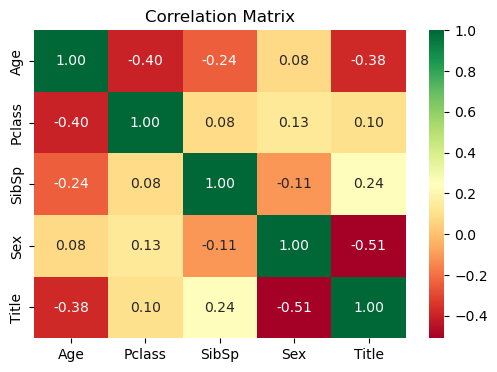

In [2106]:
corr_matrix = X_train_combined.corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap = "RdYlGn", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

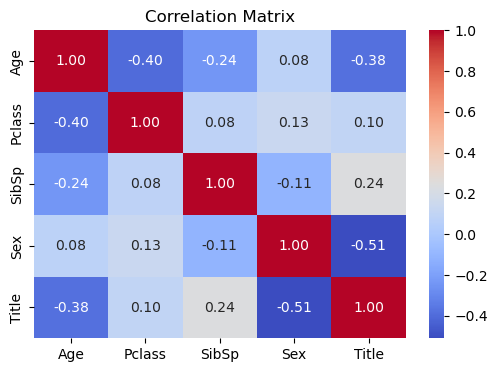

In [2107]:
# Correlation matrix
corr_matrix = X_train_combined.corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Cross Validation

In [2108]:
model = RandomForestClassifier()
scores = cross_val_score(model, X_train_combined, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.76966292 0.80898876 0.83707865 0.79775281 0.82022472]
Mean cross-validation score: 0.8067415730337079


### Modeling

In [2109]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(solver = 'liblinear', random_state=42, max_iter=200),
    'SVM': SVC(probability=True),
     'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [2110]:
model_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_combined, y_train, cv=5)
    model_scores[model_name] = scores
    print(f'{model_name} Cross-validation scores: {scores}')
    print(f'{model_name} Mean cross-validation score: {scores.mean()}')

RandomForest Cross-validation scores: [0.7752809  0.80898876 0.84269663 0.79775281 0.83707865]
RandomForest Mean cross-validation score: 0.8123595505617978
LogisticRegression Cross-validation scores: [0.80898876 0.78651685 0.80337079 0.78651685 0.79775281]
LogisticRegression Mean cross-validation score: 0.7966292134831461
SVM Cross-validation scores: [0.83707865 0.82022472 0.80337079 0.76404494 0.83707865]
SVM Mean cross-validation score: 0.8123595505617978
KNN Cross-validation scores: [0.79213483 0.79213483 0.81460674 0.8258427  0.84269663]
KNN Mean cross-validation score: 0.8134831460674157


In [2111]:
# Select the best model based on cross-validation score (you can manually select or automate this)
best_model_name = max(model_scores, key=lambda k: model_scores[k].mean())
best_model = models[best_model_name]
print(f'Best Model: {best_model_name}')

Best Model: KNN


In [2112]:
# Train the best model on the entire training set
best_model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_combined)

### Hyperparameter Tuning

In [2113]:
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train_combined, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score: 0.8292134831460676


In [2114]:
model = LogisticRegression(random_state=42)

param_grid = {
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_combined, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 1, 'max_iter': 200, 'solver': 'saga'}
Best cross-validation score: 0.8


In [2115]:
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_combined, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.8258426966292134


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
model = SVC(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient
    'degree': [2, 3, 4]            # Degree for 'poly' kernel
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train_combined, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
model = LogisticRegression(random_state=42)

param_grid = {
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_combined, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

In [1822]:
models = {
    'RandomForest': RandomForestClassifier(
        bootstrap=False, 
        max_depth=None, 
        min_samples_leaf=4, 
        min_samples_split=10, 
        n_estimators=50, 
        random_state=42
    ),
    'LogisticRegression': LogisticRegression(
        C=1, 
        max_iter=200, 
        solver='saga', 
        random_state=42
    ),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(
        metric='euclidean', 
        n_neighbors=3, 
        weights='uniform'
    )
}


In [1823]:
model_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_combined, y_train, cv=5)
    model_scores[model_name] = scores
    print(f'{model_name} Cross-validation scores: {scores}')
    print(f'{model_name} Mean cross-validation score: {scores.mean()}')

RandomForest Cross-validation scores: [0.80898876 0.82022472 0.85393258 0.80337079 0.85955056]
RandomForest Mean cross-validation score: 0.8292134831460676
LogisticRegression Cross-validation scores: [0.80898876 0.78651685 0.80337079 0.79775281 0.80337079]
LogisticRegression Mean cross-validation score: 0.8


C:\Users\Bluechip\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SVM Cross-validation scores: [0.83707865 0.82022472 0.80337079 0.76404494 0.83707865]
SVM Mean cross-validation score: 0.8123595505617978
KNN Cross-validation scores: [0.78089888 0.80898876 0.86516854 0.82022472 0.85393258]
KNN Mean cross-validation score: 0.8258426966292134


In [1824]:
# Train the best model on the entire training set
best_model.fit(X_train_combined, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_combined)

### Without Tuning
- RandomForest Mean cross-validation score: 0.8123595505617978   (81.2%)
- LogisticRegression Mean cross-validation score: 0.7966292134831461  (79.7%)
- SVM Mean cross-validation score: 0.8123595505617978  (81.2%)
- KNN Mean cross-validation score: 0.8134831460674157 (81.3%)
    
### With Tuning
- RandomForest Mean cross-validation score: 0.8292134831460676  (82.9%)
- LogisticRegression Mean cross-validation score: 0.8 (80%)
- SVM Mean cross-validation score: 0.8123595505617978 (81.2%)
- KNN Mean cross-validation score: 0.8258426966292134  (82.6%)

In [1867]:
# Create the submission DataFrame
submitted_prediction = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],  # Include PassengerId from the original test data
    'Survived': y_pred.astype(int)         # Ensure Survived predictions are integers
})

In [1868]:
# Save the DataFrame as a CSV file for submission
submitted_prediction.to_csv('gender_submission.csv', index=False)

In [1865]:
print(submitted_prediction.shape)

(417, 2)


In [1837]:
test_copy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeGroup
0,892,3,male,34.5,0,0,Q,Mr,Adult
1,893,3,female,47.0,1,0,S,Mrs,Middle-aged
2,894,2,male,62.0,0,0,Q,Mr,Senior
3,895,3,male,27.0,0,0,S,Mr,Adult
4,896,3,female,22.0,1,1,S,Mrs,Adult


### Result Analysis

In [1839]:
# Assuming 'test_with_predictions' contains the original test data including 'PassengerId'
# and 'y_pred' contains the predictions
test_with_predictions = test_copy
test_with_predictions['Survived'] = y_pred.astype(int)

In [1853]:
survival_counts = test_with_predictions['Survived'].value_counts()
survival_counts.head()

Survived
0    263
1    154
Name: count, dtype: int64

In [1852]:
gender_survival = test_with_predictions.groupby('Sex')['Survived'].value_counts().unstack()
gender_survival.head()

Survived,0,1
Sex,,
female,35,117
male,228,37


In [1851]:
title_survival = test_with_predictions.groupby('Title')['Survived'].value_counts().unstack()
title_survival.head()

Survived,0,1
Title,,
Col,1.0,1.0
Dr,NaN,1.0
Master,5.0,16.0
Miss,27.0,52.0
Mr,220.0,19.0


In [1850]:
agegroup_survival = test_with_predictions.groupby('AgeGroup')['Survived'].value_counts().unstack()
agegroup_survival.head()

Survived,0,1
AgeGroup,,
Child,4,19
Teenager,9,9
Adult,177,81
Middle-aged,67,38
Senior,6,7


In [1849]:
pclass_survival = test_with_predictions.groupby('Pclass')['Survived'].value_counts().unstack()
pclass_survival.head()

Survived,0,1
Pclass,,
1,43,64
2,61,32
3,159,58


In [1862]:
sibsp_survival = test_with_predictions.groupby('SibSp')['Survived'].value_counts().unstack()
sibsp_survival.head()

Survived,0,1
SibSp,,
0,199.0,83.0
1,45.0,65.0
2,9.0,5.0
3,3.0,1.0
4,4.0,NaN


### Visualization

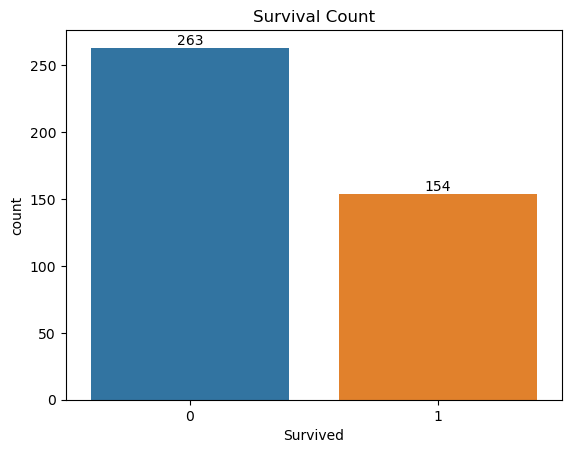

In [1855]:
sns.countplot(x='Survived', data=test_with_predictions)
plt.title('Survival Count')

for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

Negative (0):  263
Positive (1):  154


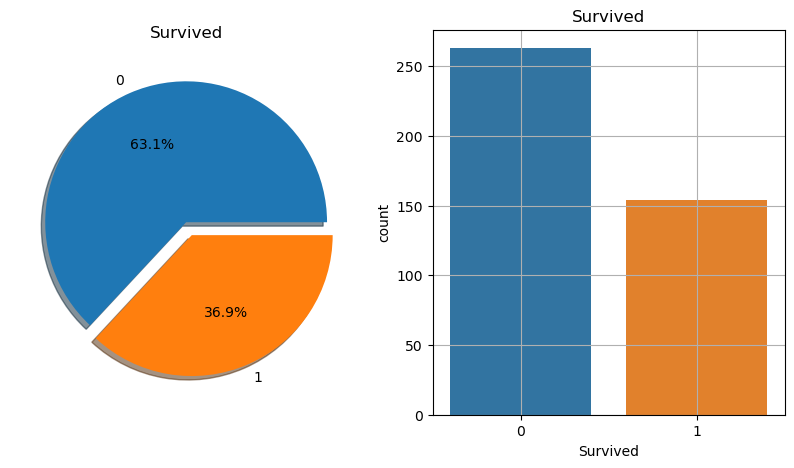

In [1869]:
# Outcome count plot
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie plot
test_with_predictions['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Survived', data = test_with_predictions, ax = ax[1])
ax[1].set_title('Survived')

# Display the counts
N, P = test_with_predictions['Survived'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)

plt.grid()
plt.show()


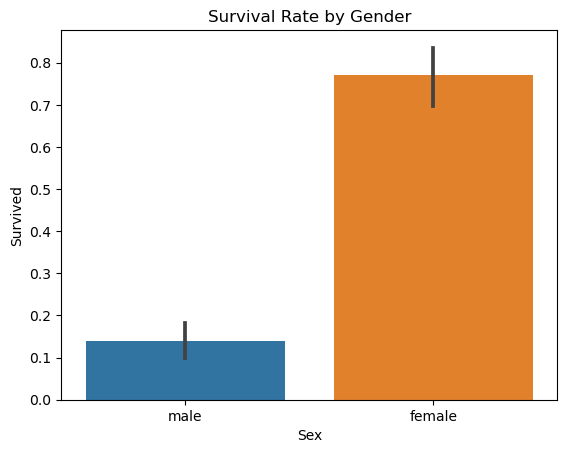

In [1860]:
sns.barplot(x='Sex', y='Survived', data=test_with_predictions)
plt.title('Survival Rate by Gender')
plt.show()

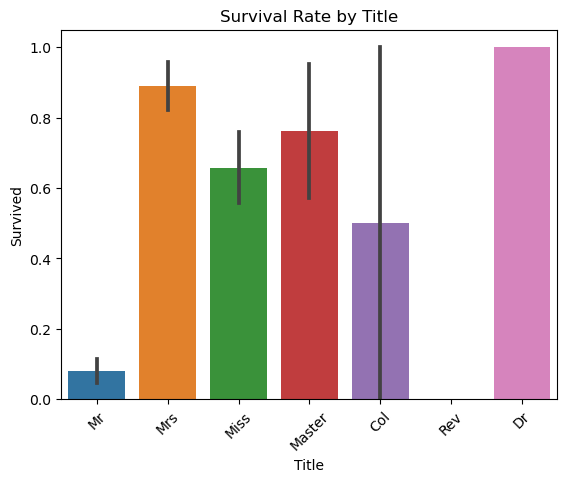

In [1861]:
sns.barplot(x='Title', y='Survived', data=test_with_predictions)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)

plt.show()